In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns


In [10]:
data = pd.read_csv(r"C:\Users\GASTO\Downloads\chip_dataset.csv")

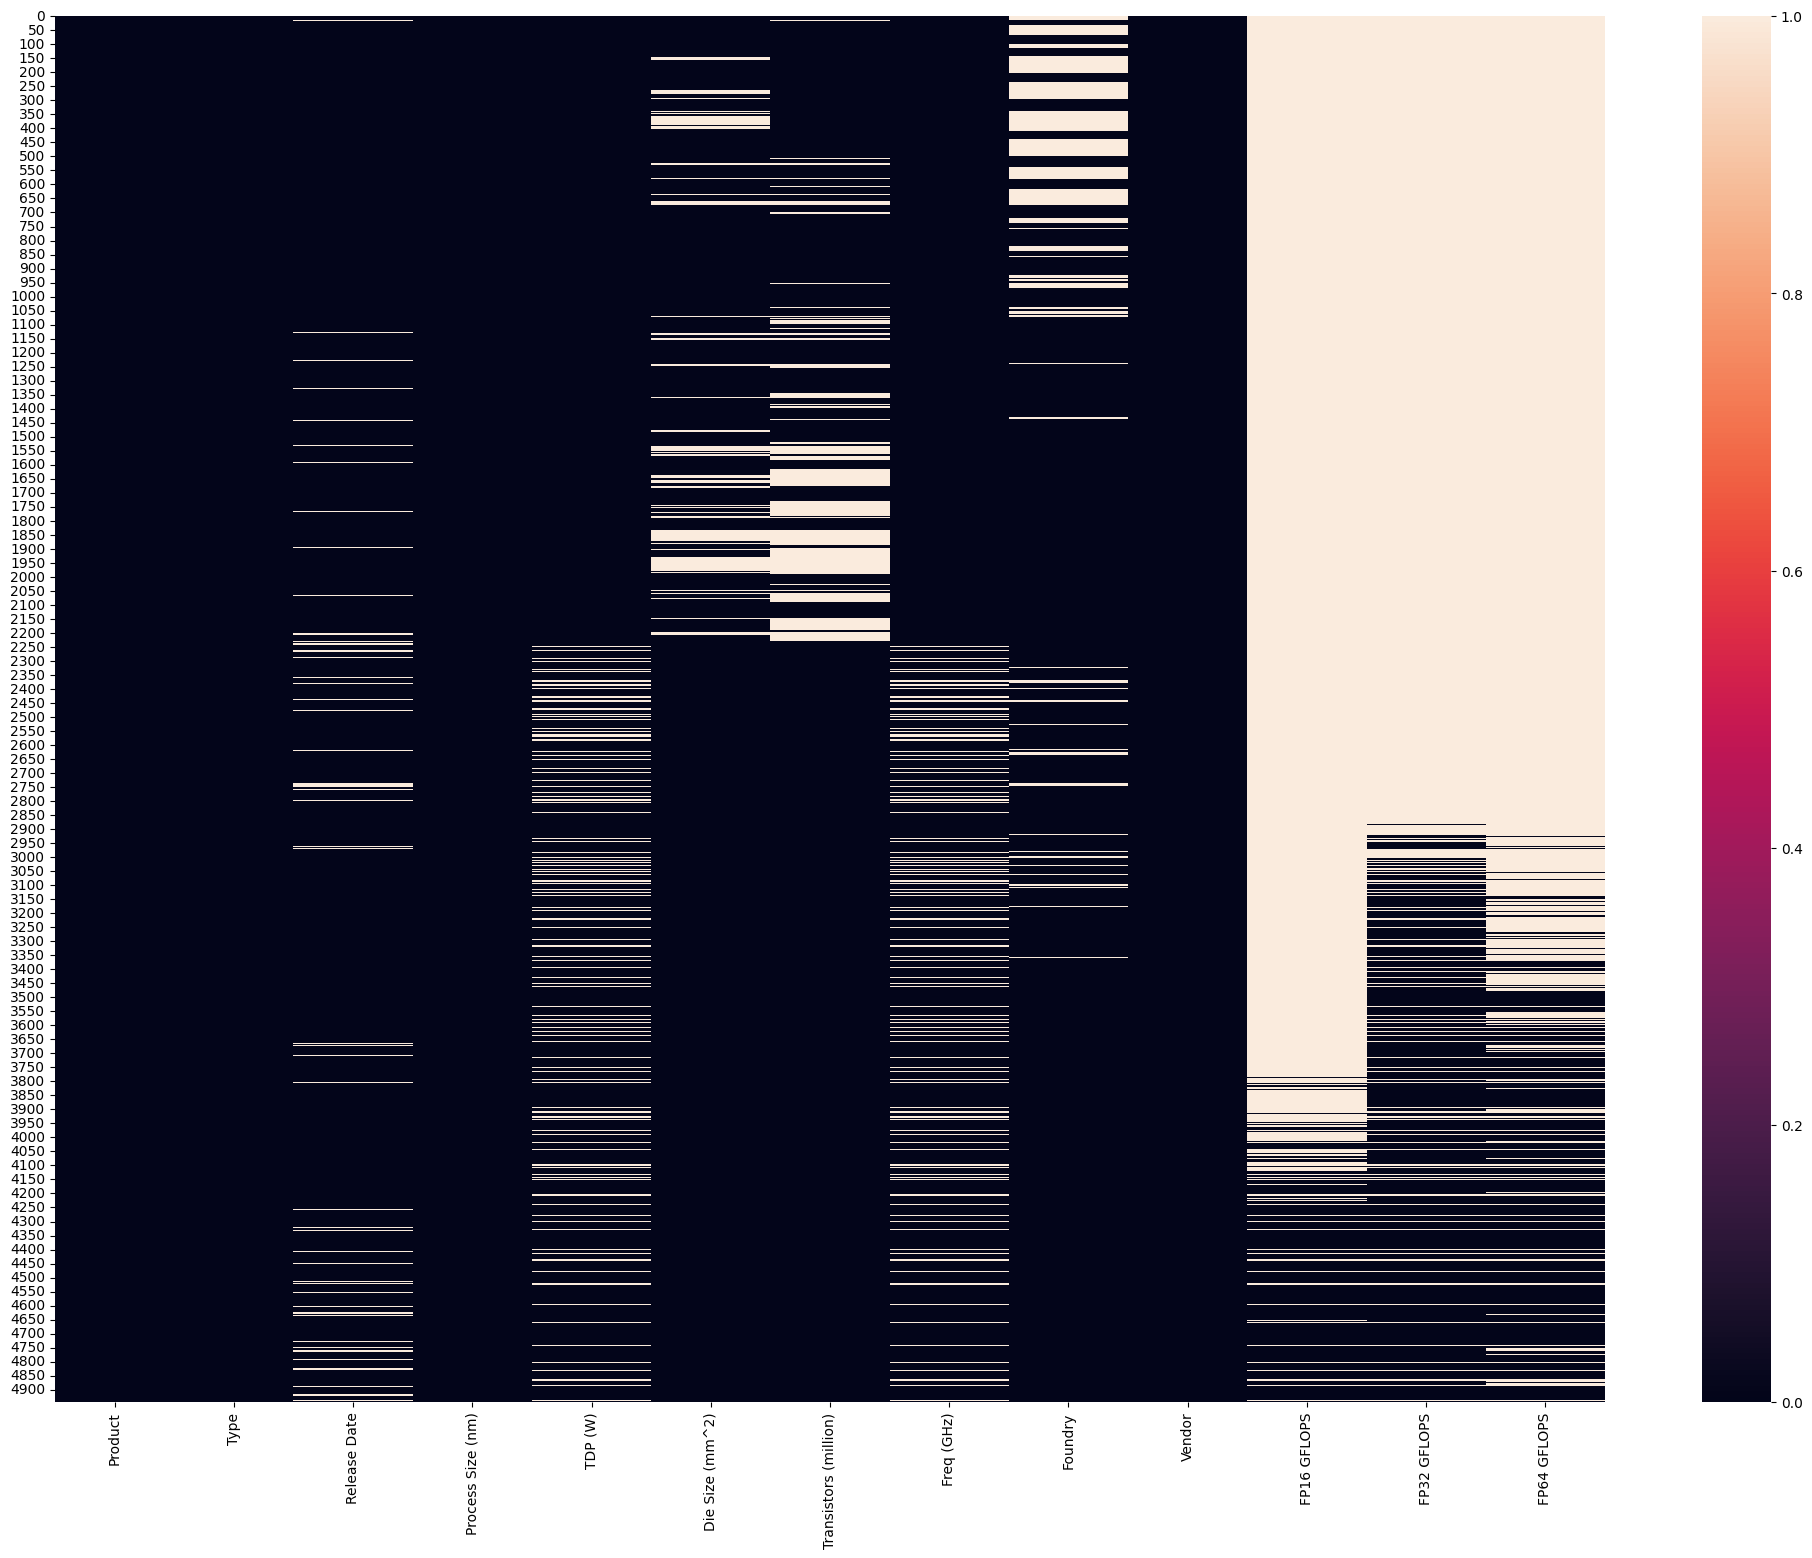

In [11]:
null=data.isnull()
plt.figure(figsize=(25,18))
sns.heatmap(data=null)
plt.show()


In [5]:
null

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,False,False,False,False,False,False,False,False,True,False,True,True,True
1,False,False,False,False,False,False,False,False,True,False,True,True,True
2,False,False,False,False,False,False,False,False,True,False,True,True,True
3,False,False,False,False,False,False,False,False,True,False,True,True,True
4,False,False,False,False,False,False,False,False,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,False,False,True,False,False,False,False,False,False,False,False,False,False
4941,False,False,False,False,False,False,False,False,False,False,False,False,False
4942,False,False,False,False,False,False,False,False,False,False,False,False,False
4943,False,False,False,False,False,False,False,False,False,False,False,False,False


strategy to deal with missing values ie.deletion,imputation by mean,or mode ,whilst rationale for your approach

In [12]:
per_missingness=(data.isnull().sum()/len(data))*100
per_missingness

Product                   0.000000
Type                      0.000000
Release Date              4.024267
Process Size (nm)         0.000000
TDP (W)                   8.837209
Die Size (mm^2)           7.118301
Transistors (million)    11.223458
Freq (GHz)                8.837209
Foundry                  12.436805
Vendor                    0.000000
FP16 GFLOPS              83.822042
FP32 GFLOPS              65.925177
FP64 GFLOPS              74.155713
dtype: float64

In [13]:
null.sum()

Product                     0
Type                        0
Release Date              199
Process Size (nm)           0
TDP (W)                   437
Die Size (mm^2)           352
Transistors (million)     555
Freq (GHz)                437
Foundry                   615
Vendor                      0
FP16 GFLOPS              4145
FP32 GFLOPS              3260
FP64 GFLOPS              3667
dtype: int64

for the column 'process size (m)and 'release data',impute with mode since they have a low percentage of null values

In [14]:
data['Process Size (nm)']=data['Process Size (nm)'].fillna(data['Process Size (nm)'].ffill())
data['Process Size (nm)'].isnull().sum()

np.int64(0)

In [15]:
data['Process Size (nm)'].mode()

0    14
Name: Process Size (nm), dtype: object

In [16]:
data['Release Date']=data['Release Date'].fillna(data['Release Date'].ffill())
data['Release Date'].isnull().sum()

np.int64(0)

In [17]:
data['Release Date'].mode()

0    9/1/13
Name: Release Date, dtype: object

for the numerical columns 'TDP','Die Size','Transistors','Freq' we can use median imputation to maintain distribution

In [18]:
columns_to_convert=['TDP (W)','Die Size (mm^2)','Transistors (million)','Freq (GHz)']
for col in columns_to_convert:
    data[col]=pd.to_numeric(data[col],errors='coerce')

In [19]:
data['TDP (W)']=data['TDP (W)'].fillna(data['TDP (W)'].median())
data['TDP (W)'].isnull().sum()

np.int64(0)

In [20]:
data['Die Size (mm^2)']=data['Die Size (mm^2)'].fillna(data['Die Size (mm^2)'].median())
data['Die Size (mm^2)'].isnull().sum()

np.int64(0)

In [21]:
data['Transistors (million)']=data['Transistors (million)'].fillna(data['Transistors (million)'].median())
data['Transistors (million)'].isnull().sum()

np.int64(0)

In [22]:
data['Freq (GHz)']=data['Freq (GHz)'].fillna(data['Freq (GHz)'].median())
data['Freq (GHz)'].isnull().sum()

np.int64(0)

for categorical columns such as 'foudary' we can use mode imputation

In [23]:
data['Foundry']=data['Foundry'].fillna(data['Foundry'].mode()[0])
data.isnull().sum()

Product                     0
Type                        0
Release Date                0
Process Size (nm)           0
TDP (W)                     0
Die Size (mm^2)             0
Transistors (million)       0
Freq (GHz)                  0
Foundry                     0
Vendor                      0
FP16 GFLOPS              4145
FP32 GFLOPS              3260
FP64 GFLOPS              3667
dtype: int64

In [24]:
data['FP32 GFLOPS'].value_counts()

FP32 GFLOPS
384.00      22
80.00       17
192.00      14
240.00      12
96.00       12
            ..
10540.00     1
1665.00      1
245.80       1
81.28        1
71810.00     1
Name: count, Length: 869, dtype: int64

In [25]:
data['FP32 GFLOPS'].mean()

np.float64(5403.009359050446)

for columns 'FP16','FP64' ,we can use deletion tecnque due to high percentage of missing values

In [26]:
data=data.drop(columns=['FP16 GFLOPS','FP64 GFLOPS'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4945 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4945 non-null   float64
 5   Die Size (mm^2)        4945 non-null   float64
 6   Transistors (million)  4945 non-null   float64
 7   Freq (GHz)             4945 non-null   float64
 8   Foundry                4945 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP32 GFLOPS            1685 non-null   float64
dtypes: float64(5), object(6)
memory usage: 425.1+ KB


Tranform temporal data to their correct format (datetime)

In [27]:
data['Release Date']=pd.to_datetime(data['Release Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product                4945 non-null   object        
 1   Type                   4945 non-null   object        
 2   Release Date           4945 non-null   datetime64[ns]
 3   Process Size (nm)      4945 non-null   object        
 4   TDP (W)                4945 non-null   float64       
 5   Die Size (mm^2)        4945 non-null   float64       
 6   Transistors (million)  4945 non-null   float64       
 7   Freq (GHz)             4945 non-null   float64       
 8   Foundry                4945 non-null   object        
 9   Vendor                 4945 non-null   object        
 10  FP32 GFLOPS            1685 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 425.1+ KB


C:\Users\GASTO\AppData\Local\Temp\ipykernel_21448\818946877.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Release Date']=pd.to_datetime(data['Release Date'])


In [28]:
data['Year']=data['Release Date'].dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product                4945 non-null   object        
 1   Type                   4945 non-null   object        
 2   Release Date           4945 non-null   datetime64[ns]
 3   Process Size (nm)      4945 non-null   object        
 4   TDP (W)                4945 non-null   float64       
 5   Die Size (mm^2)        4945 non-null   float64       
 6   Transistors (million)  4945 non-null   float64       
 7   Freq (GHz)             4945 non-null   float64       
 8   Foundry                4945 non-null   object        
 9   Vendor                 4945 non-null   object        
 10  FP32 GFLOPS            1685 non-null   float64       
 11  Year                   4945 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(1), object(5)
memory u

In [29]:
data['Year'].value_counts()

Year
2004    231
2010    227
2008    225
2011    223
2012    223
2014    222
2006    222
2020    221
2015    220
2013    220
2003    220
2005    219
2018    217
2009    216
2021    216
2022    216
2017    214
2019    214
2023    213
2007    206
2016    175
2002    125
2001    121
2000     88
2024     50
1999      1
Name: count, dtype: int64

In [30]:
data['Process Size (nm)']=data['Process Size (nm)'].sort_values(ascending=False).values
data['Process Size (nm)']

0       90
1       90
2       90
3       90
4       90
        ..
4940     0
4941     0
4942     0
4943     0
4944     0
Name: Process Size (nm), Length: 4945, dtype: object

Perform a full EDA and demonstrate the validity of the following assumptions:

Moore's Law still holds, especially in GPUs.

Dannard Scaling is still valid in general.

CPUs have higher frequencies, but GPUs are catching up.

GPU performance doubles every 1.5 years.

GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.

High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.

Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors

TSMC makes the highest number of chips in the world

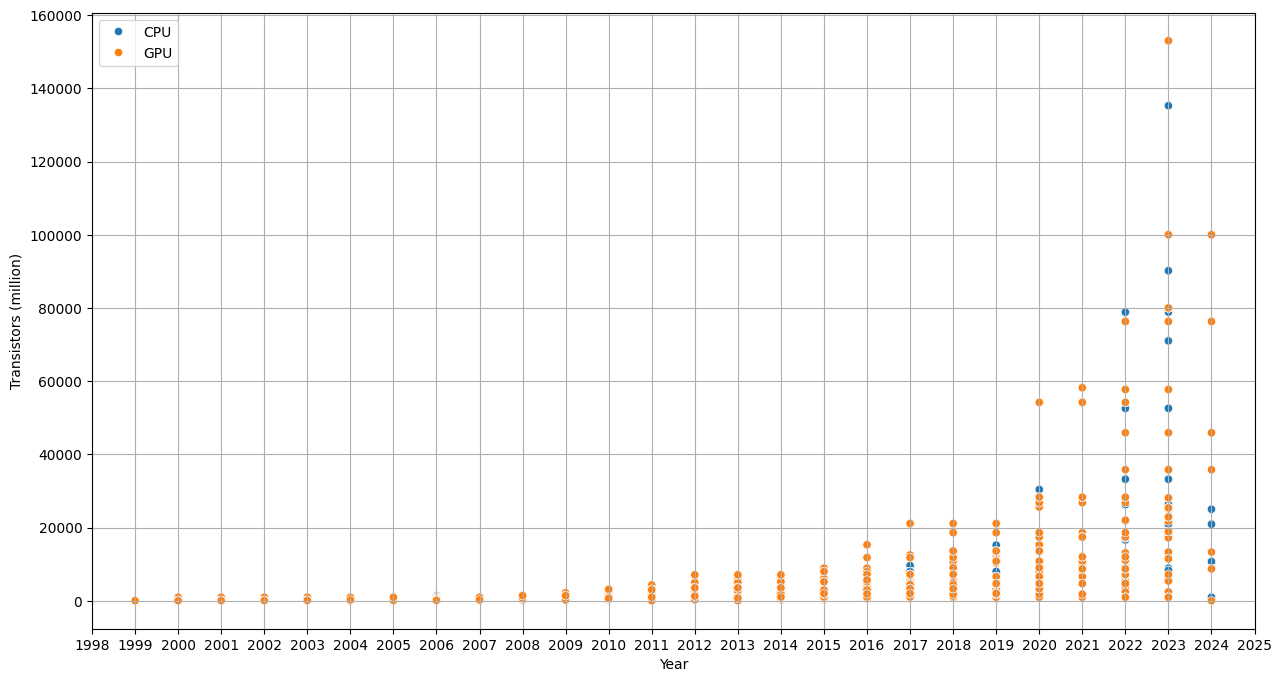

In [31]:
# moore's law still holds ,especially in Gpus.
# moore's law ,which predicts that the number of transistors on a microchip will double approximately two years
fig,ax=plt.subplots(figsize=(15,8))
sns.scatterplot(data=data,x='Year',y='Transistors (million)',hue='Type')
ax.set_xlim(1998,2025)
ax.locator_params(axis='x',nbins=27)
ax.grid(True)
plt.legend()
plt.show()



-there is a clear visual outcome in the years that is from 1999 to 2024  with CPU and GPU  showing an increae in the transistors yearly demonstrarting exponential growth.

- In the year 1998- 2010 the number of transistors in both CPUs  and GPUs was relatively low and increased gradually.


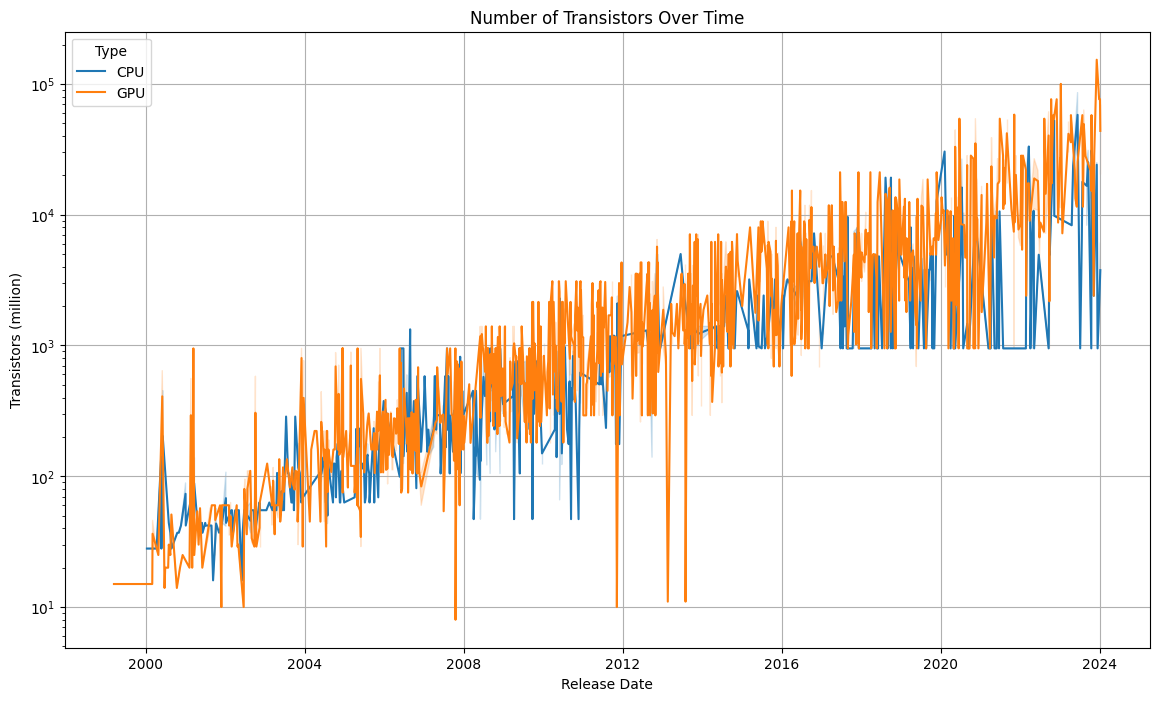

In [32]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Release Date', y='Transistors (million)', hue='Type', data=data)
plt.yscale('log')
plt.title('Number of Transistors Over Time')
plt.xlabel('Release Date')
plt.ylabel('Transistors (million)')
plt.legend(title='Type')
plt.grid(True)
plt.show()

gives a clear visual bt still one cannot clearly see how CPU  and GPU were relating towards transmittors in the diffirent years 

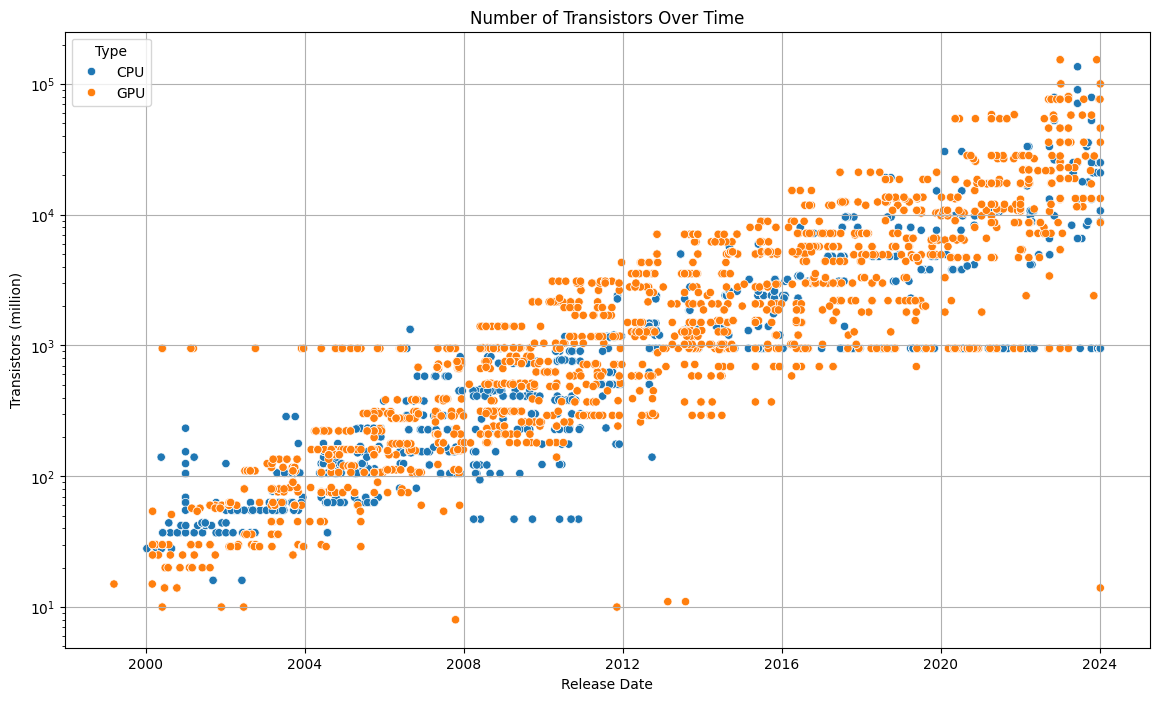

In [33]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Release Date', y='Transistors (million)', hue='Type', data=data)
plt.yscale('log')
plt.title('Number of Transistors Over Time')
plt.xlabel('Release Date')
plt.ylabel('Transistors (million)')
plt.legend(title='Type')
plt.grid(True)
plt.show()

does not clearly show the outcome of the data and can only be used with few x columns ,hence don't use it if you want to clearly understand the implentation per year

Dennard Scaling states that as transistors get smaller, their power density stays constant, so that power usage stays in proportion with area (both voltage and current scale down with length). We can plot the relationship between process size and TDP.

In [34]:
data.columns

Index(['Product', 'Type', 'Release Date', 'Process Size (nm)', 'TDP (W)',
       'Die Size (mm^2)', 'Transistors (million)', 'Freq (GHz)', 'Foundry',
       'Vendor', 'FP32 GFLOPS', 'Year'],
      dtype='object')

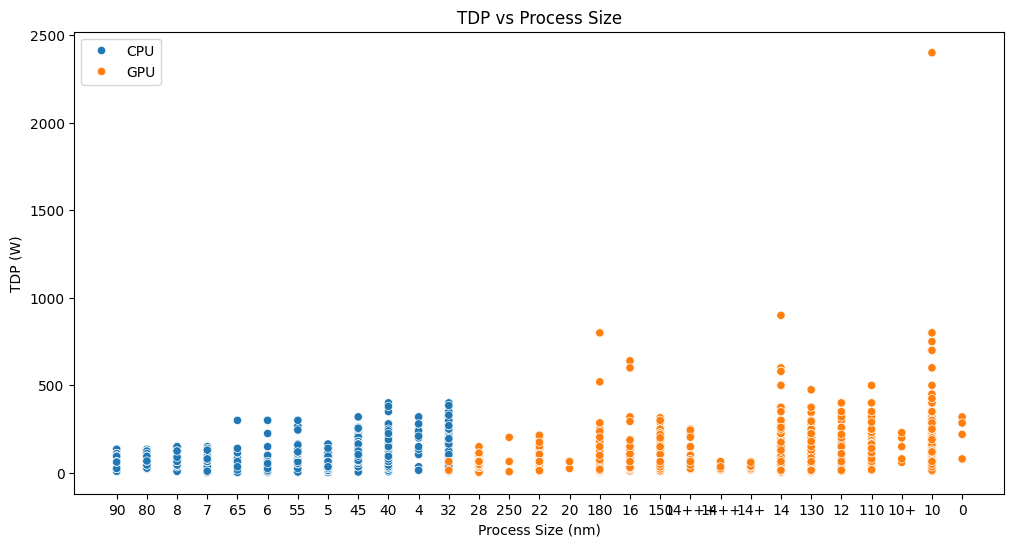

In [35]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data,x='Process Size (nm)',y='TDP (W)',hue='Type')
plt.title('TDP vs Process Size')
plt.xlabel('Process Size (nm)')
plt.ylabel('TDP (W)')
plt.legend()
plt.show()

_ Note that (TDP) is thermal designed power in watts.

-x axis represent the semiconductor process technology in nanometers while the y axis represents the TDP that indicates  the  amount of heat  generated by a component hence the power consumption.
- from the graph one can see that CPU has  a wide process size  range from small to very large and most of its TPD is below 500W.

-GPU are mostly clusttered around the smaller size indicating they adopted to use of newer technologies more rapidly and their TDP shows a wide range with some being over 1000W.

-   INTREPRETATION:
  - both CPU and GPU are using smaller process size over time that aligns with the advancements in semiconductors technologies .
  - there is a broad distribution of TDP values in GPU ,indicating a significant variation in power consumption and heat generation across diffirent models and technologies .
  - from these we can say GPU have higher TDP compared to CPU hence a higher power consumption .



In [39]:
data.columns

Index(['Product', 'Type', 'Release Date', 'Process Size (nm)', 'TDP (W)',
       'Die Size (mm^2)', 'Transistors (million)', 'Freq (GHz)', 'Foundry',
       'Vendor', 'FP32 GFLOPS', 'Year'],
      dtype='object')

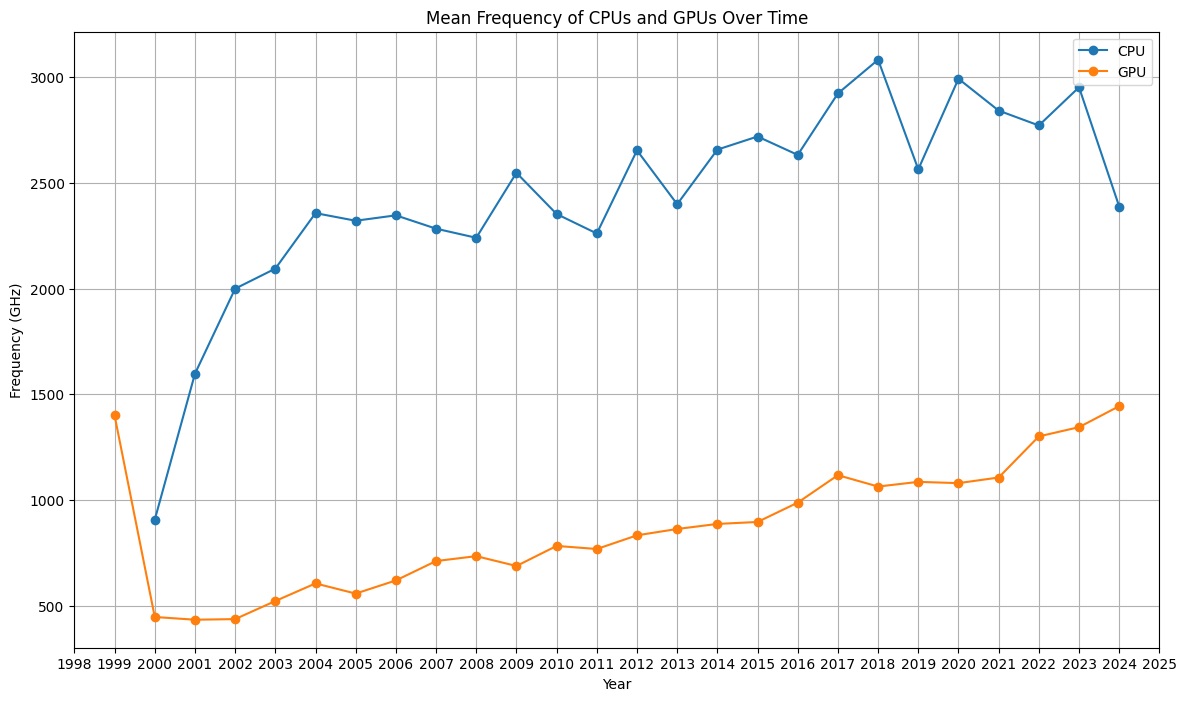

In [41]:
# Plot frequencies over time
cpu_data=data[data['Type']=='CPU']
gpu_data=data[data['Type']=='GPU']
cpu_yearly=cpu_data.groupby('Year')['Freq (GHz)'].mean().reset_index()
gpu_yearly=gpu_data.groupby('Year')['Freq (GHz)'].mean().reset_index()
 #Plotting
fig,ax = plt.subplots(figsize=(14, 8))
ax.plot(cpu_yearly['Year'], cpu_yearly['Freq (GHz)'], label='CPU', marker='o')
ax.plot(gpu_yearly['Year'], gpu_yearly['Freq (GHz)'], label='GPU', marker='o')
ax.set_title('Mean Frequency of CPUs and GPUs Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Frequency (GHz)')
ax.set_xlim(1998,2025)
ax.locator_params(axis='x',nbins=27)
plt.legend()
plt.grid(True)
plt.show()



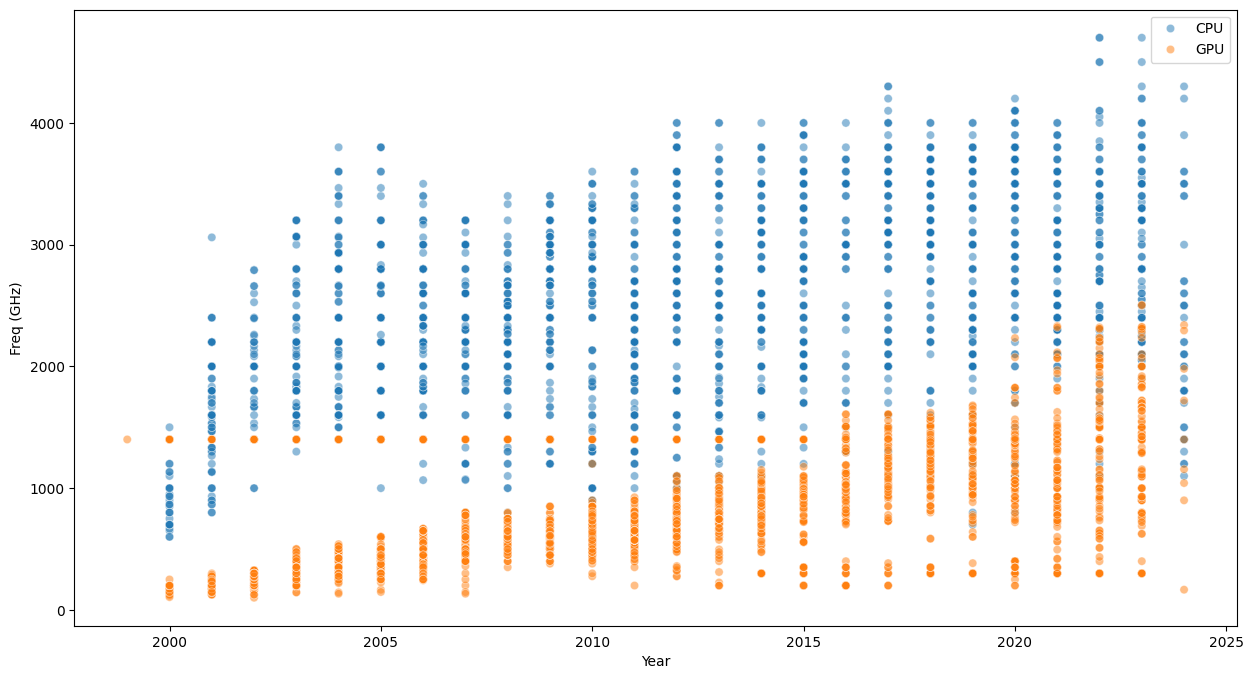

In [43]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data,x='Year',y='Freq (GHz)',hue='Type',alpha=0.5)
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

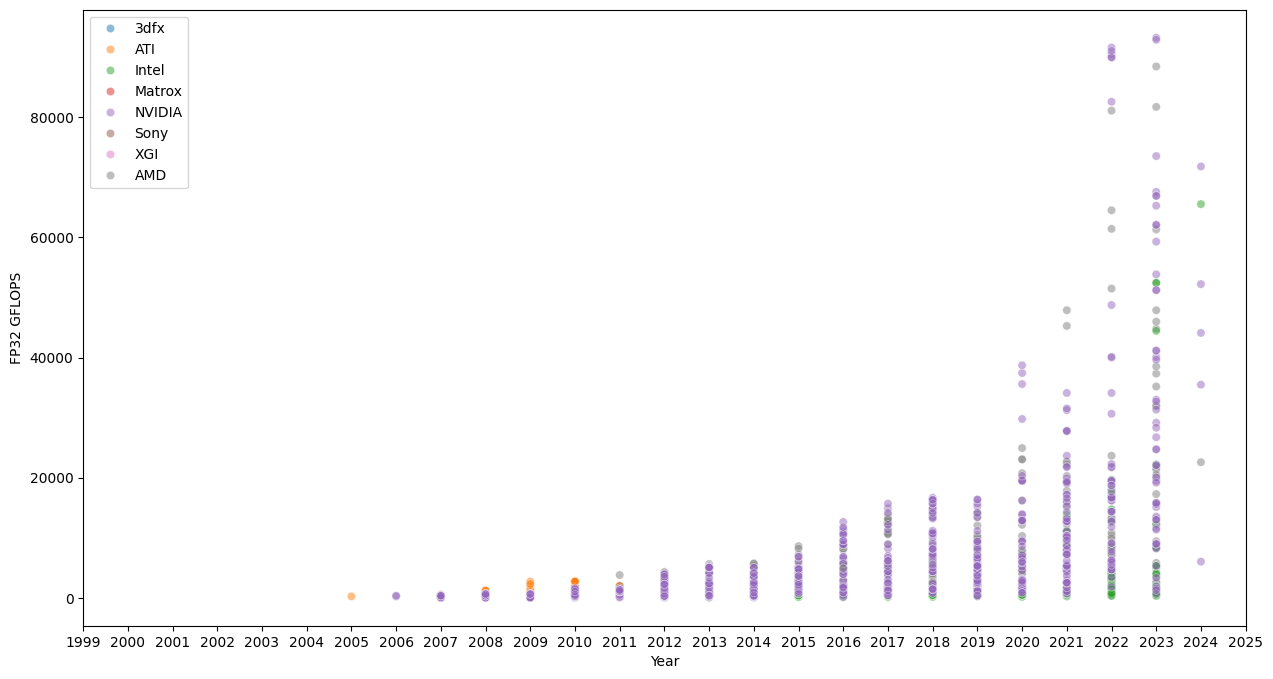

In [44]:
gpu = data[data['Type']=='GPU']

fig,ax= plt.subplots(figsize=(15,8))
sns.scatterplot(data=gpu,x='Year',y='FP32 GFLOPS',hue='Vendor',alpha=0.5)
ax.set_xlim(1999,2025)
ax.locator_params(axis='x',nbins=26)
plt.legend()
plt.show

In [45]:
# GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.

corr_matrix = gpu[[ 'Die Size (mm^2)', 'Freq (GHz)', 'Transistors (million)']].corr()

corr_matrix

,Die Size (mm^2),Freq (GHz),Transistors (million)
Die Size (mm^2),1.000000,0.276369,0.691542
Freq (GHz),0.276369,1.000000,0.346887
Transistors (million),0.691542,0.346887,1.000000


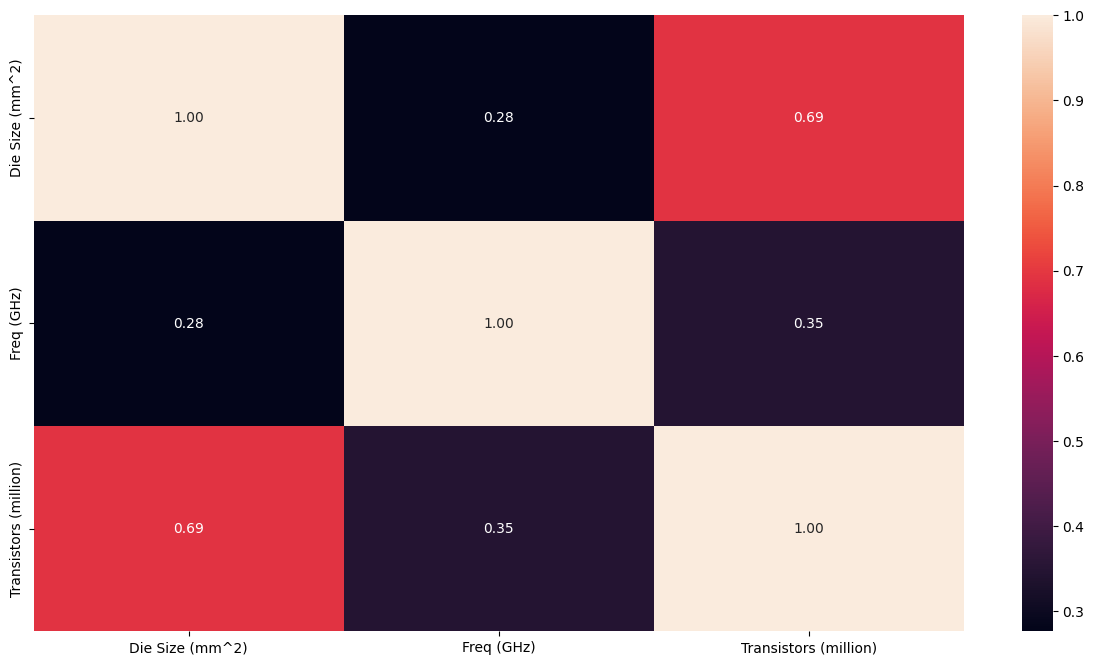

In [46]:
plt.figure(figsize=(15,8))

sns.heatmap(data=corr_matrix,annot=True,fmt='.2f')
plt.show()

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product                4945 non-null   object        
 1   Type                   4945 non-null   object        
 2   Release Date           4945 non-null   datetime64[ns]
 3   Process Size (nm)      4945 non-null   object        
 4   TDP (W)                4945 non-null   float64       
 5   Die Size (mm^2)        4945 non-null   float64       
 6   Transistors (million)  4945 non-null   float64       
 7   Freq (GHz)             4945 non-null   float64       
 8   Foundry                4945 non-null   object        
 9   Vendor                 4945 non-null   object        
 10  FP32 GFLOPS            1685 non-null   float64       
 11  Year                   4945 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(1), object(5)
memory u

In [55]:
gpu=data[' Process Size (nm) ']=pd.to_numeric(data['Process Size (nm)'],errors='coerce')

In [57]:
data.columns

Index(['Product', 'Type', 'Release Date', 'Process Size (nm)', 'TDP (W)',
       'Die Size (mm^2)', 'Transistors (million)', 'Freq (GHz)', 'Foundry',
       'Vendor', 'FP32 GFLOPS', 'Year', ' Process Size (nm) '],
      dtype='object')

In [ ]:



lower_quantile = gpu['FP32 GFLOPS'].quantile(0.25)
upper_quantile = gpu['FP32 GFLOPS'].quantile(0.75)

high_end_gpus = gpu[gpu['FP32 GFLOPS'] >= upper_quantile]
low_end_gpus =gpu[gpu['FP32 GFLOPS'] <= lower_quantile]

# Group by year and calculate mean process size for high-end and low-end GPUs
high_end_process_size_by_year = high_end_gpus.groupby('Year')['Process Size (nm)'].mean().reset_index()
low_end_process_size_by_year = low_end_gpus.groupby('Year')['Process Size (nm)'].mean().reset_index()

# Plot the data
fig,ax = plt.subplots(figsize=(15, 8))
ax.plot(high_end_process_size_by_year['Year'], high_end_process_size_by_year['Process Size (nm)'], label='High-end GPUs', marker='o')
ax.plot(low_end_process_size_by_year['Year'], low_end_process_size_by_year['Process Size (nm)'], label='Low-end GPUs', marker='o')
ax.set_title('Mean Process Size Over Time for High-end and Low-end GPUs')
ax.set_xlabel('Year')
ax.set_ylabel('Process Size (nm)')
ax.set_xlim(1999,2024)
ax.locator_params(axis='x',nbins=25)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\GASTO\AppData\Local\Temp\ipykernel_21448\3740517343.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


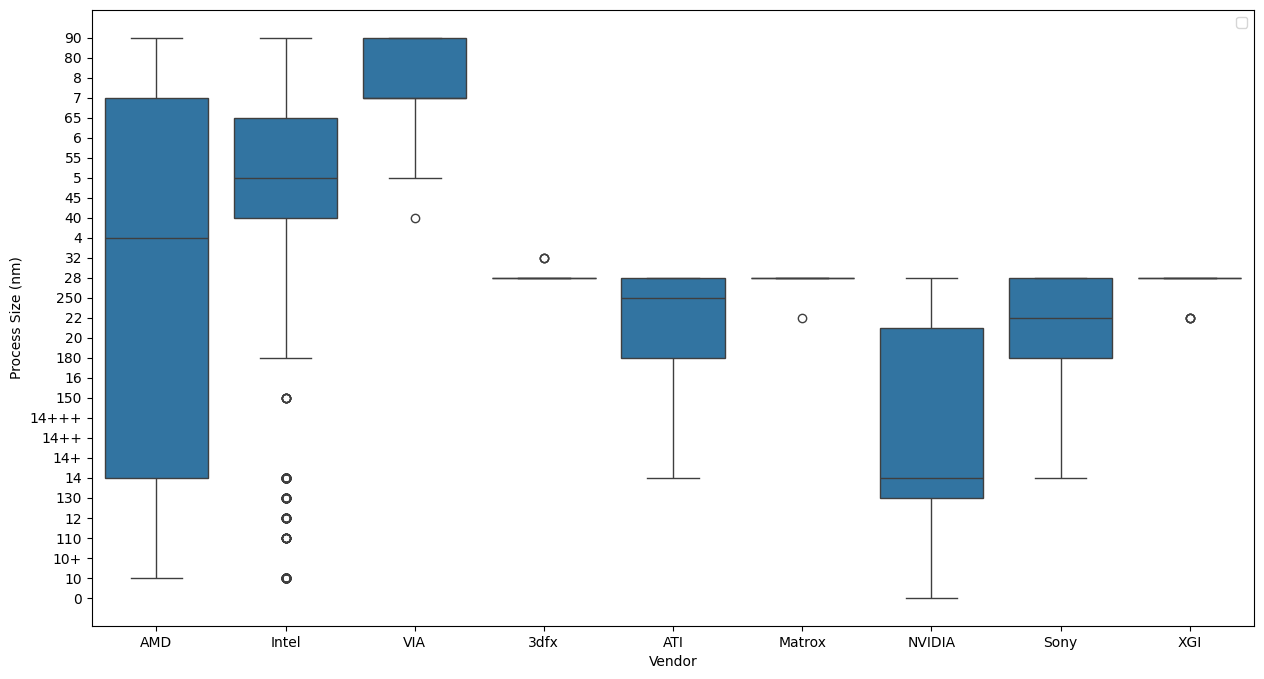

In [52]:
fig,ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=data,y='Process Size (nm)',x='Vendor')
ax.legend()
plt.show()

In [ ]:
corr_matrix = data[['Release Date','Process Size (nm)','TDP (W)','Die Size (mm^2)','Transistors (million)','FP32 GFLOPS']].corr()
corr_matrix